<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Project 1  
#### Zerin Dong
#### Feb 27th, 2017

### Requirements

1. You need to perform an exhaustive exploration of your dataset.
2. Your code must show command and understanding of Python (Codeacademy and class 1,2,3 notes)
3. You need to define functions (no matter how complicated they are)
4. You don't need to do any modeling

    1. Load and clean, if neccessary, the data with pandas.
    2. Describe the data and investigate any outliers.
    3. Explore relationships between the variables.
    4. Visualize at least five variables of your choice with appropriate visualizations. They should be readable.
    5. Visualize subsets of the variables you chose, subsetted conditional on some other variable. 

5. Write a brief report on at least 5 things you found interesting about the data or, if it doesn't interest you at all, things you found out and why they are boring.

## 1. Preperation & Data Description

In [1]:
# preperation: import data modules 
import numpy as np
import scipy.stats as stats
import pandas as pd

# preperation: import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# make sure charts appear in the notebook:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [2]:
# data: drones
path_to_file = "/Users/zerindong/Desktop/ECON628-01-zerin5577/datasets/drone_strikes/drones.csv"
drones= pd.read_csv(path_to_file)

In [3]:
drones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 27 columns):
Strike ID                   381 non-null int64
Bureau ID                   381 non-null object
Date                        381 non-null object
Time                        77 non-null object
Location                    381 non-null object
Area                        381 non-null object
Target                      65 non-null object
Target Group                124 non-null object
Westerners involved         2 non-null object
Minimum Total Killed        381 non-null int64
Mean Total Killed           283 non-null float64
Maximum Total Killed        381 non-null int64
Number of deaths            373 non-null object
AQ/TB Killed                41 non-null object
Minimum civilians killed    173 non-null float64
Maximum civilians killed    173 non-null float64
Civilians Killed            267 non-null object
Min injured                 305 non-null float64
Max injured                 305 non

In [4]:
drones.describe().T

/Applications/Utilities/anaconda/envs/econ/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,count,mean,std,min,25%,50%,75%,max
Strike ID,381.0,201.551181,115.718309,3.0,103.0,201.0,298.0,412.0
Minimum Total Killed,381.0,6.330709,6.933582,0.0,3.0,4.0,7.0,81.0
Mean Total Killed,283.0,9.088339,8.613199,0.0,NaN,NaN,NaN,82.0
Maximum Total Killed,381.0,9.713911,8.656883,0.0,5.0,7.0,12.0,83.0
Minimum civilians killed,173.0,2.404624,6.721052,0.0,NaN,NaN,NaN,80.0
Maximum civilians killed,173.0,5.497110,8.717547,0.0,NaN,NaN,NaN,82.0
Min injured,305.0,3.678689,3.725142,0.0,NaN,NaN,NaN,27.0
Max injured,305.0,5.265574,5.487273,0.0,NaN,NaN,NaN,50.0
Minimum children killed,69.0,2.434783,8.232786,0.0,NaN,NaN,NaN,68.0
Max children killed,68.0,2.941176,8.534185,0.0,NaN,NaN,NaN,70.0


In [5]:
drones.isnull().sum()

Strike ID                     0
Bureau ID                     0
Date                          0
Time                        304
Location                      0
Area                          0
Target                      316
Target Group                257
Westerners involved         379
Minimum Total Killed          0
Mean Total Killed            98
Maximum Total Killed          0
Number of deaths              8
AQ/TB Killed                340
Minimum civilians killed    208
Maximum civilians killed    208
Civilians Killed            114
Min injured                  76
Max injured                  76
Injured                      49
Minimum children killed     312
Max children killed         313
Children Killed             281
Pakistani approval          362
Short Summary                 1
Related ID                  334
Notes                       378
dtype: int64

From the description above, we can see there were some variables including too many missing obs. To ensure the accuracy of the result, we need to delete them from the dataset.

In [6]:
## drop the varibles that are not valuable or including too many missing observations'Children K
drones.drop(['Time', 'Westerners involved','Injured', 'Civilians Killed', 'Children Killed','Number of deaths', 'AQ/TB Killed', 'Minimum children killed', 'Max children killed', 'Target', 'Target Group', 'Pakistani approval', 'Short Summary', 'Related ID','Notes'], axis=1, inplace=True)

#### Rename the variables 

In [7]:
## rename the variables
drones.rename(columns={
    'Minimum Total Killed':'min_total_killed',
    'Maximum Total Killed':'max_total_killed',
    'Mean Total Killed':'mean_total_killed',
    'Minimum civilians killed':'min_civi_killed',
    'Maximum civilians killed':'max_civi_killed',
    'Min injured':'min_injured',
    'Max injured':'max_injured',
    },inplace=True)

#### Replacing missing values with the means

In [8]:
drones.mean_total_killed=drones.mean_total_killed.fillna(np.mean(drones.mean_total_killed))
drones.min_civi_killed=drones.min_civi_killed.fillna(np.mean(drones.min_civi_killed))
drones.max_civi_killed=drones.max_civi_killed.fillna(np.mean(drones.max_civi_killed))
drones.min_injured=drones.min_injured.fillna(np.mean(drones.min_injured))
drones.max_injured=drones.max_injured.fillna(np.mean(drones.max_injured))

In [9]:
drones.describe().T

,count,mean,std,min,25%,50%,75%,max
Strike ID,381.0,201.551181,115.718309,3.0,103.0,201.000000,298.000000,412.0
min_total_killed,381.0,6.330709,6.933582,0.0,3.0,4.000000,7.000000,81.0
mean_total_killed,381.0,9.088339,7.419886,0.0,5.0,9.000000,9.088339,82.0
max_total_killed,381.0,9.713911,8.656883,0.0,5.0,7.000000,12.000000,83.0
min_civi_killed,381.0,2.404624,4.521782,0.0,0.0,2.404624,2.404624,80.0
max_civi_killed,381.0,5.497110,5.864983,0.0,4.0,5.497110,5.497110,82.0
min_injured,381.0,3.678689,3.331868,0.0,2.0,3.000000,4.000000,27.0
max_injured,381.0,5.265574,4.907966,0.0,3.0,4.000000,5.265574,50.0


The description chart gives us some basic information such as number of obs, minimum, maximum, mean, etc.

## 2. Data Visualizing

#### Distribution of Total Killed, Civilians Killed, and Injured

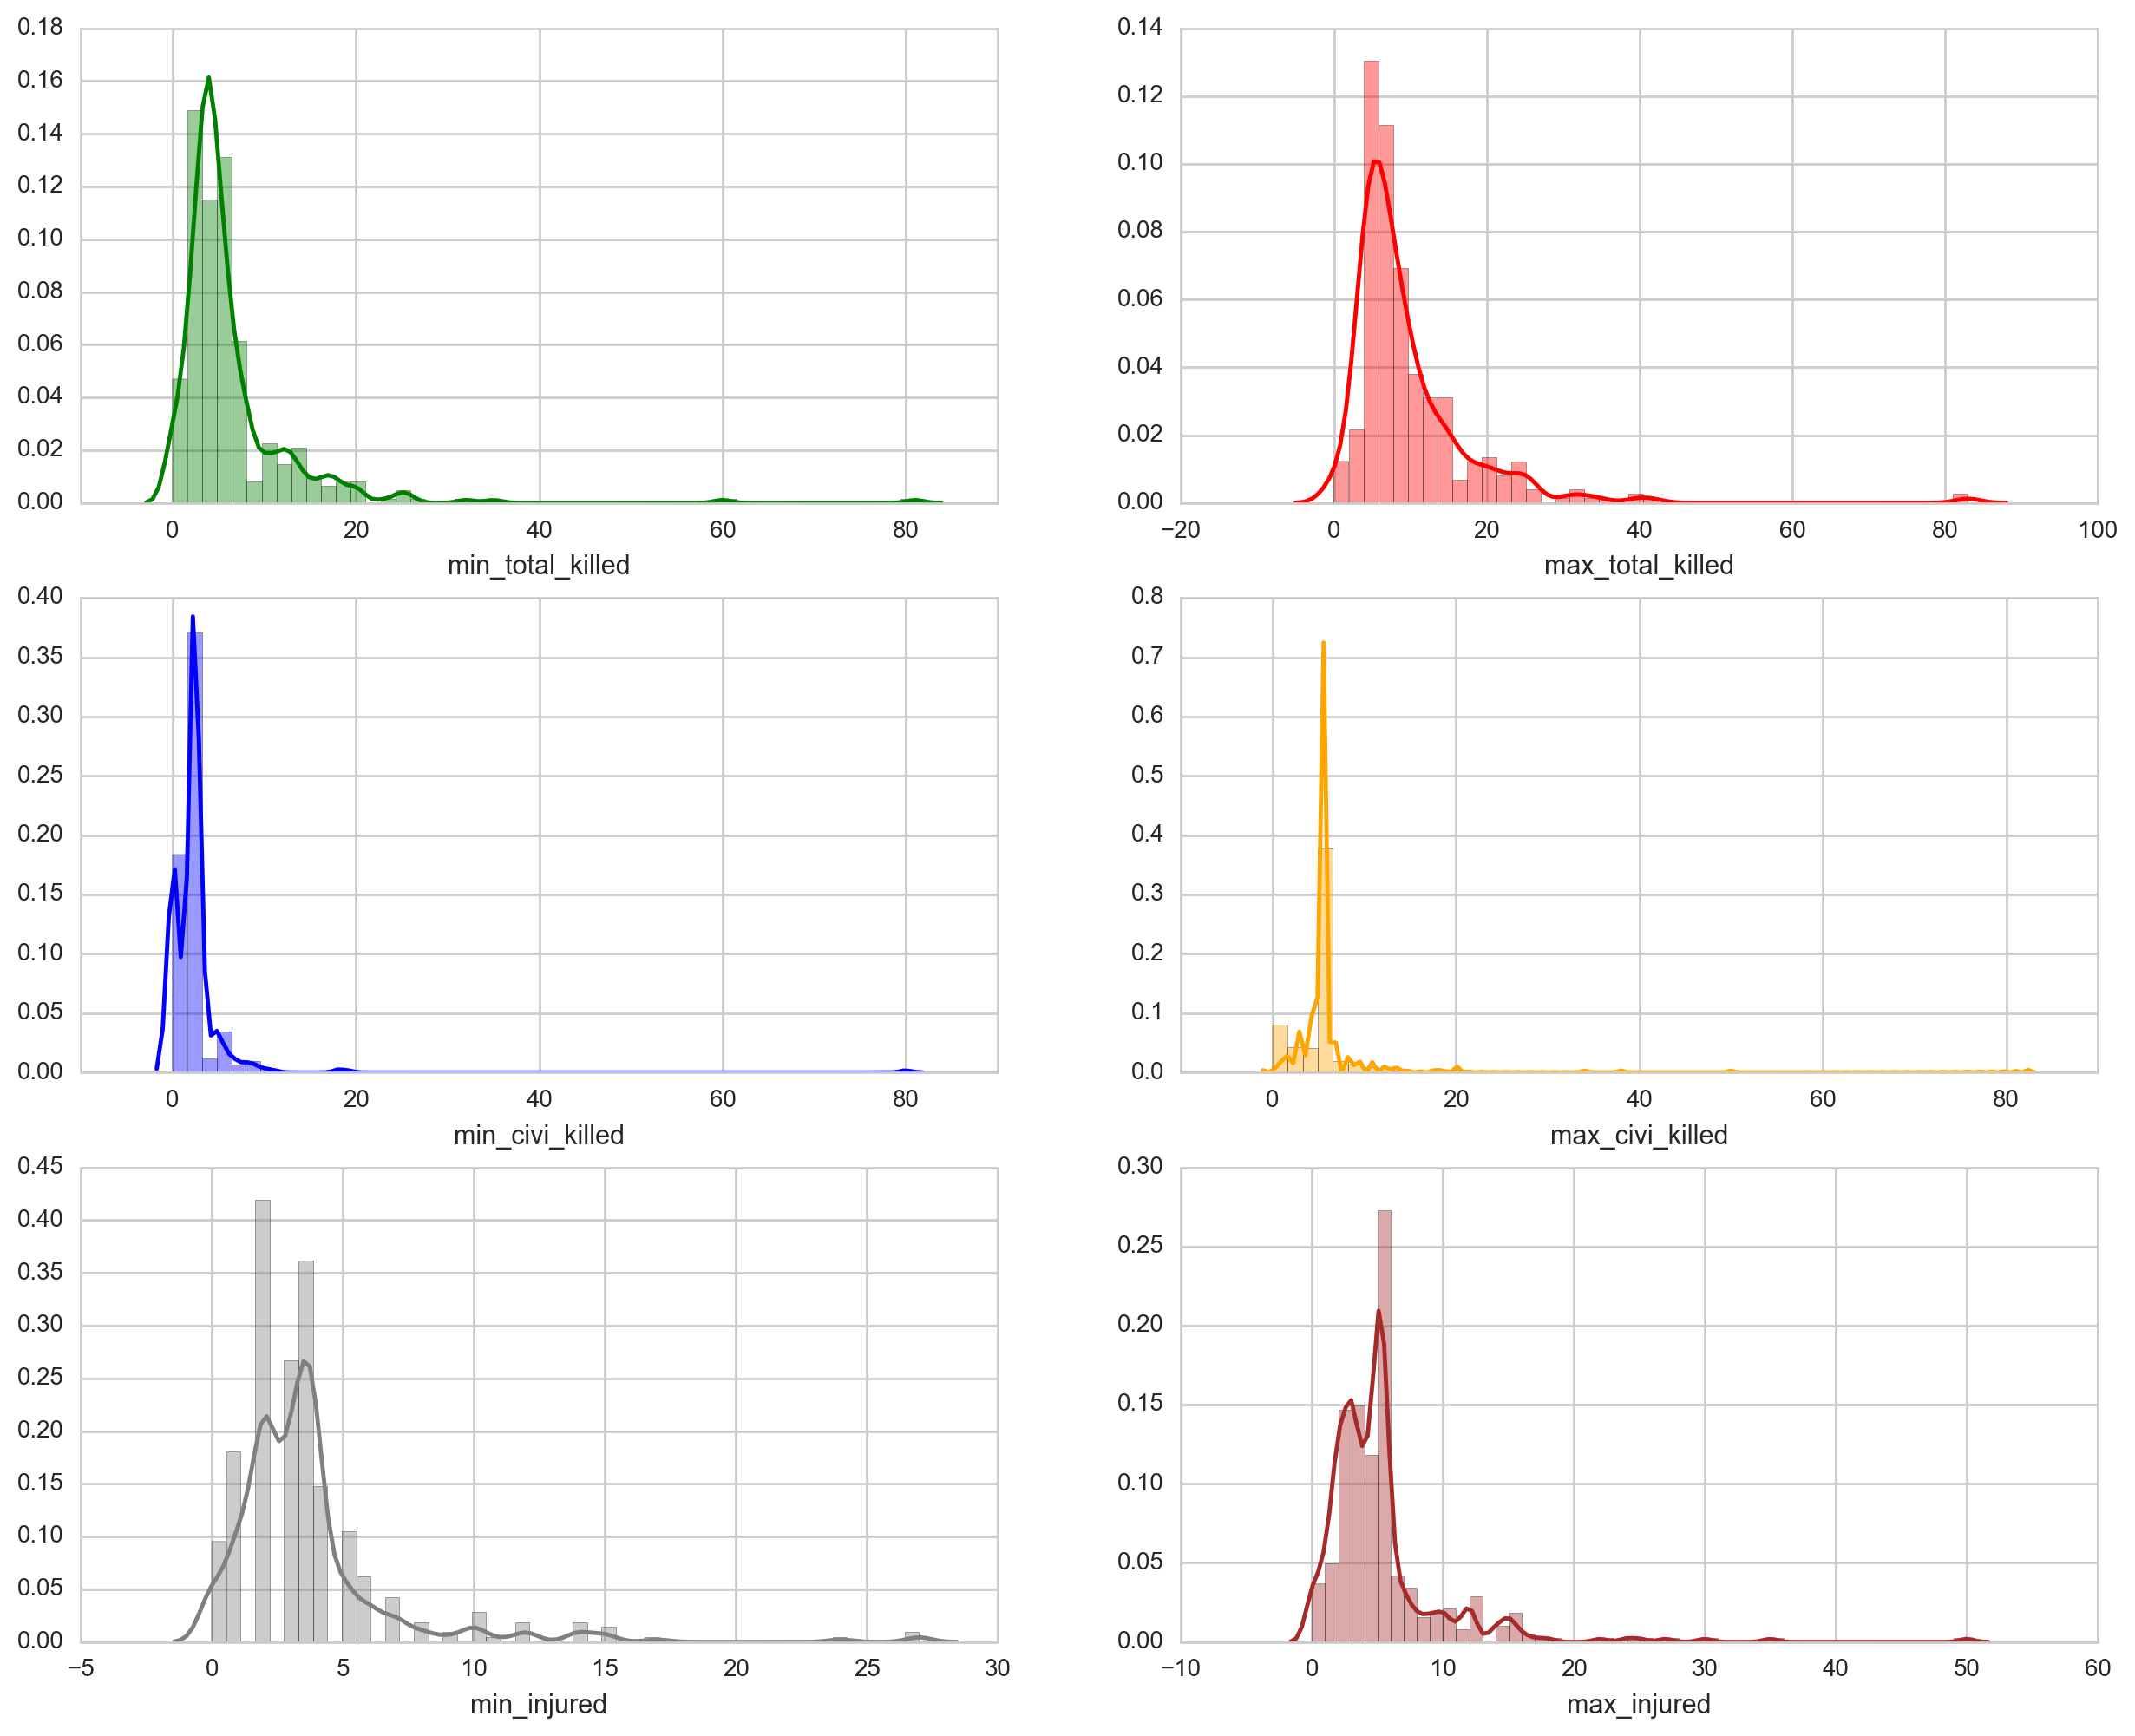

In [10]:
fig, axarr = plt.subplots(3, 2, figsize=(15,12),
                         sharex=False, sharey=False)

axarr[0,0] = sns.distplot(drones.min_total_killed, ax=axarr[0,0], color='green')

axarr[0,1] = sns.distplot(drones.max_total_killed ,ax=axarr[0,1], color='red')       
                          
axarr[1,0] = sns.distplot(drones.min_civi_killed, ax=axarr[1,0], color='blue')

axarr[1,1] = sns.distplot(drones.max_civi_killed, ax=axarr[1,1], color='orange')

axarr[2,0] = sns.distplot(drones.min_injured, ax=axarr[2,0], color='grey')

axarr[2,1] = sns.distplot(drones.max_injured, ax=axarr[2,1], color='brown')

plt.show()

The distribution result shows that all the variables share a command distribution pattern--skew to the left. In order to address a more linear relatioship in the parameters, the natural log transformation or the square root transformation will do the work.

#### Boxplot by year

In [11]:
## Extract year from Date
import datetime
drones['Date'] = pd.to_datetime(drones['Date'])
drones['year'] = drones['Date'].dt.year
drones

,Strike ID,Bureau ID,Date,Location,Area,min_total_killed,mean_total_killed,max_total_killed,min_civi_killed,max_civi_killed,min_injured,max_injured,year
0,3,B1,2004-06-17,Wana,South Waziristan,6,7.000000,8,2.000000,2.00000,1.000000,1.000000,2004
1,4,B2,2005-05-08,Toorikhel,North Waziristan,2,2.000000,2,2.404624,5.49711,3.678689,5.265574,2005
2,5,B3,2005-11-05,Mosaki,North Waziristan,8,8.000000,8,3.000000,8.00000,1.000000,1.000000,2005
3,6,B4,2005-12-01,Haisori,North Waziristan,6,5.000000,6,2.000000,3.00000,3.678689,5.265574,2005
4,8,B5,2006-01-13,Damadola,Bajaur Agency,13,20.000000,22,10.000000,18.00000,3.678689,5.265574,2006
5,9,B6,2006-10-30,Chenegai,Bajaur Agency,81,82.000000,83,80.000000,82.00000,3.000000,3.000000,2006
6,10,B7,2007-01-16,Zamazola,South Waziristan,8,8.000000,8,8.000000,8.00000,3.678689,5.265574,2007
7,11,B8,2007-04-27,Saidgai,North Waziristan,3,4.000000,4,3.000000,4.00000,3.000000,9.000000,2007
8,12,B9,2007-06-19,Mami Rogha,North Waziristan,20,27.000000,34,0.000000,34.00000,10.000000,15.000000,2007
9,13,B10,2007-11-02,Danda Darpakhel,North Waziristan,5,8.000000,10,2.404624,5.49711,6.000000,12.000000,2007


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1177f4990>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10441b910>]], dtype=object)

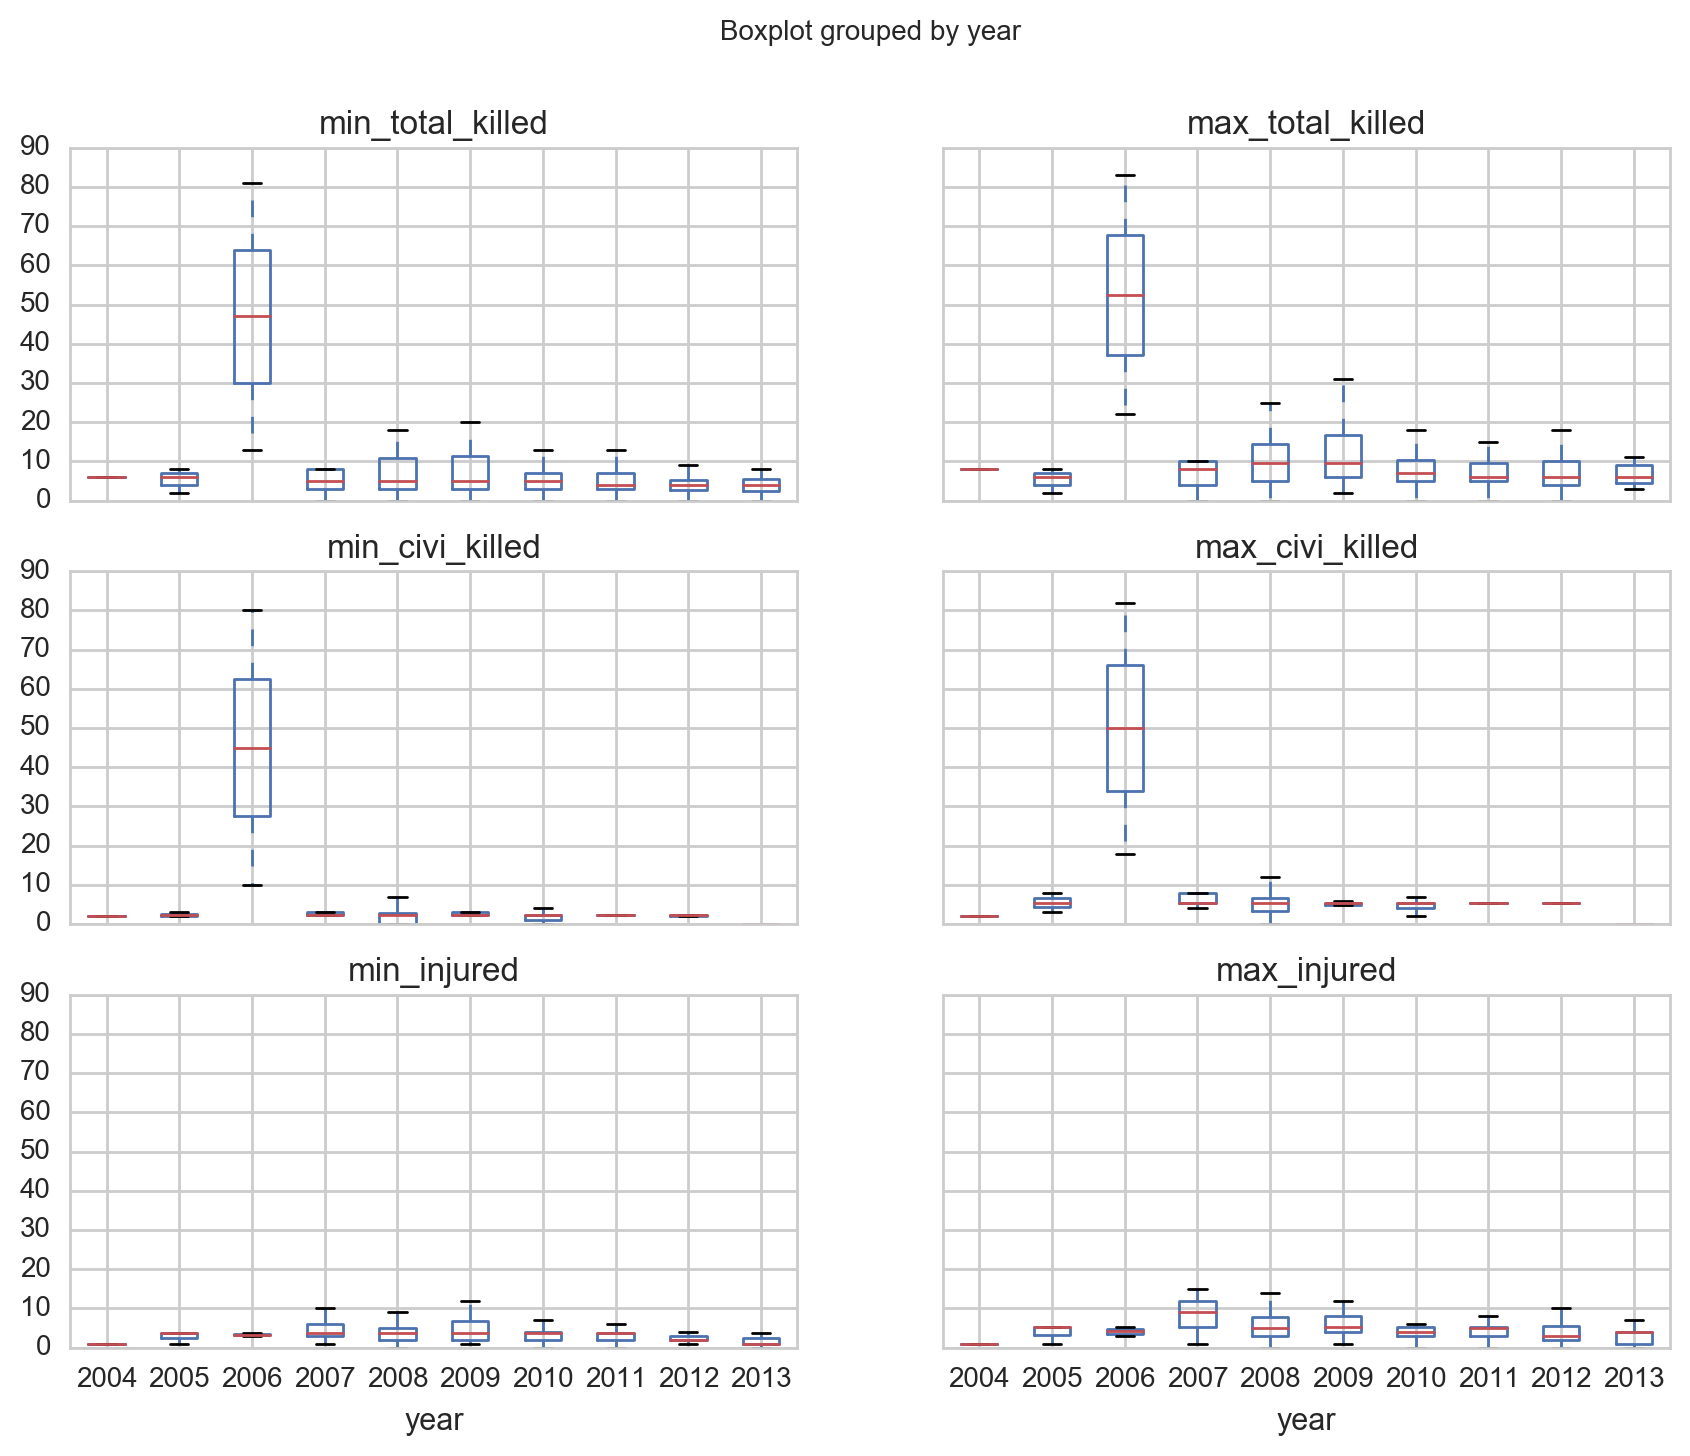

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
drones.boxplot(column=['min_total_killed','max_total_killed','min_civi_killed','max_civi_killed','min_injured','max_injured'],by="year", figsize=(10,8))

Box Plot is a easy way to spot the outliners, we may need to delete them to avoid our model suffer from Het. problem.

#### Time Series

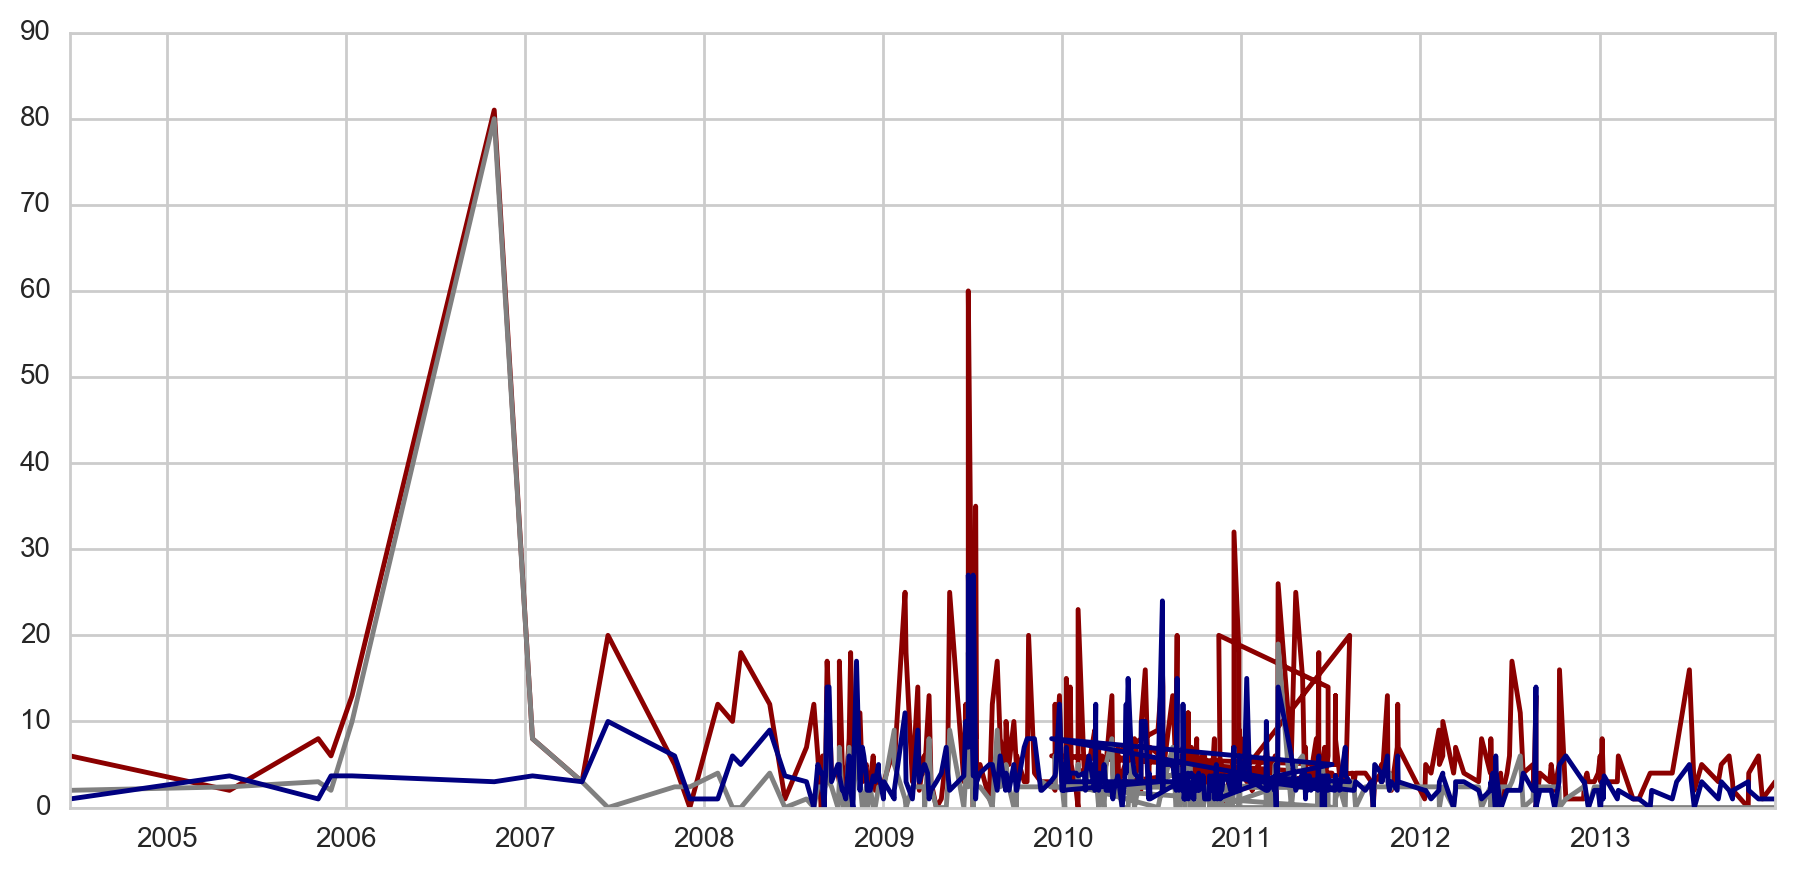

In [13]:
fig = plt.figure(figsize=(11,5))
plt.plot(drones.Date,drones.min_total_killed,c='darkred')
plt.plot(drones.Date,drones.min_civi_killed,c='grey')
plt.plot(drones.Date,drones.min_injured,c='navy')

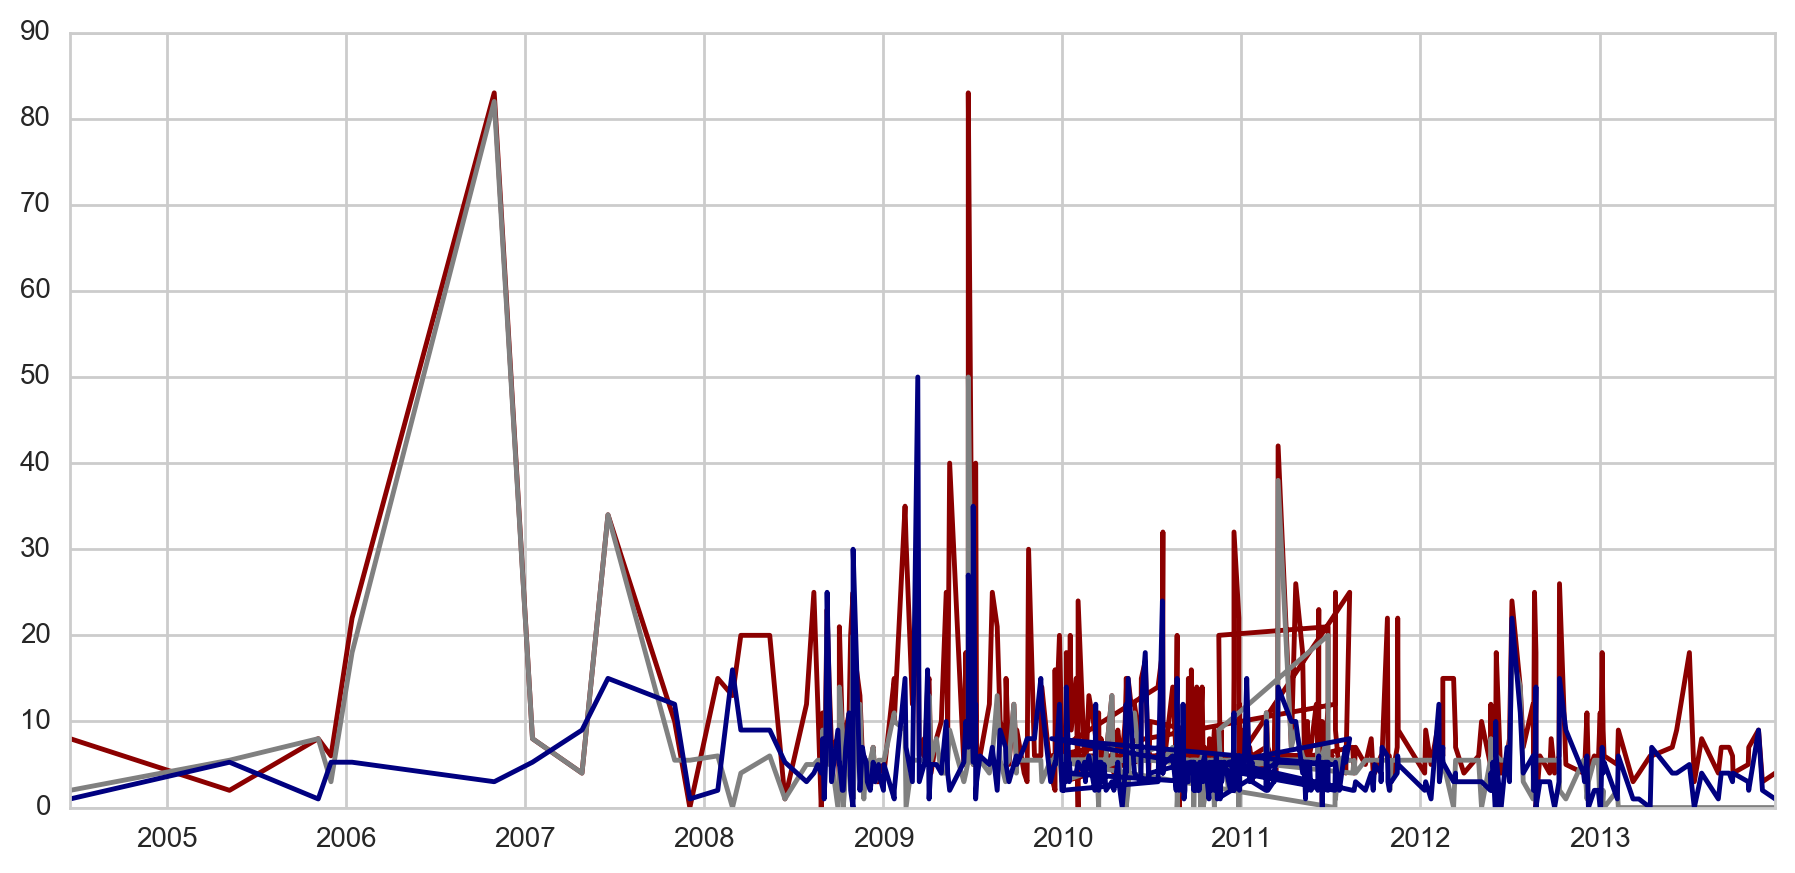

In [14]:
fig = plt.figure(figsize=(11,5))
plt.plot(drones.Date,drones.max_total_killed,c='darkred')
plt.plot(drones.Date,drones.max_civi_killed,c='grey')
plt.plot(drones.Date,drones.max_injured,c='navy')

From the ts lines, we can get some conclusions below:
1. Variables Minimum/Maximum total killed and Minimum/Maximum civilians killed increased over time until 2007, and the number of total killed & civi killed have reached the maximum points. 
2. Compared to the "total killed" and "civi killed", the number of max/min injured were much lower. The number of "min/max injured" reached the peak in the year of 2009.
3. Obviously, the variables in our dataset suffer from seasonality and cycles. Hence, for the further analysis in regression section, I would suggest some appropriate transformations for these variables.


/Applications/Utilities/anaconda/envs/econ/lib/python2.7/site-packages/pandas/tools/plotting.py:968: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


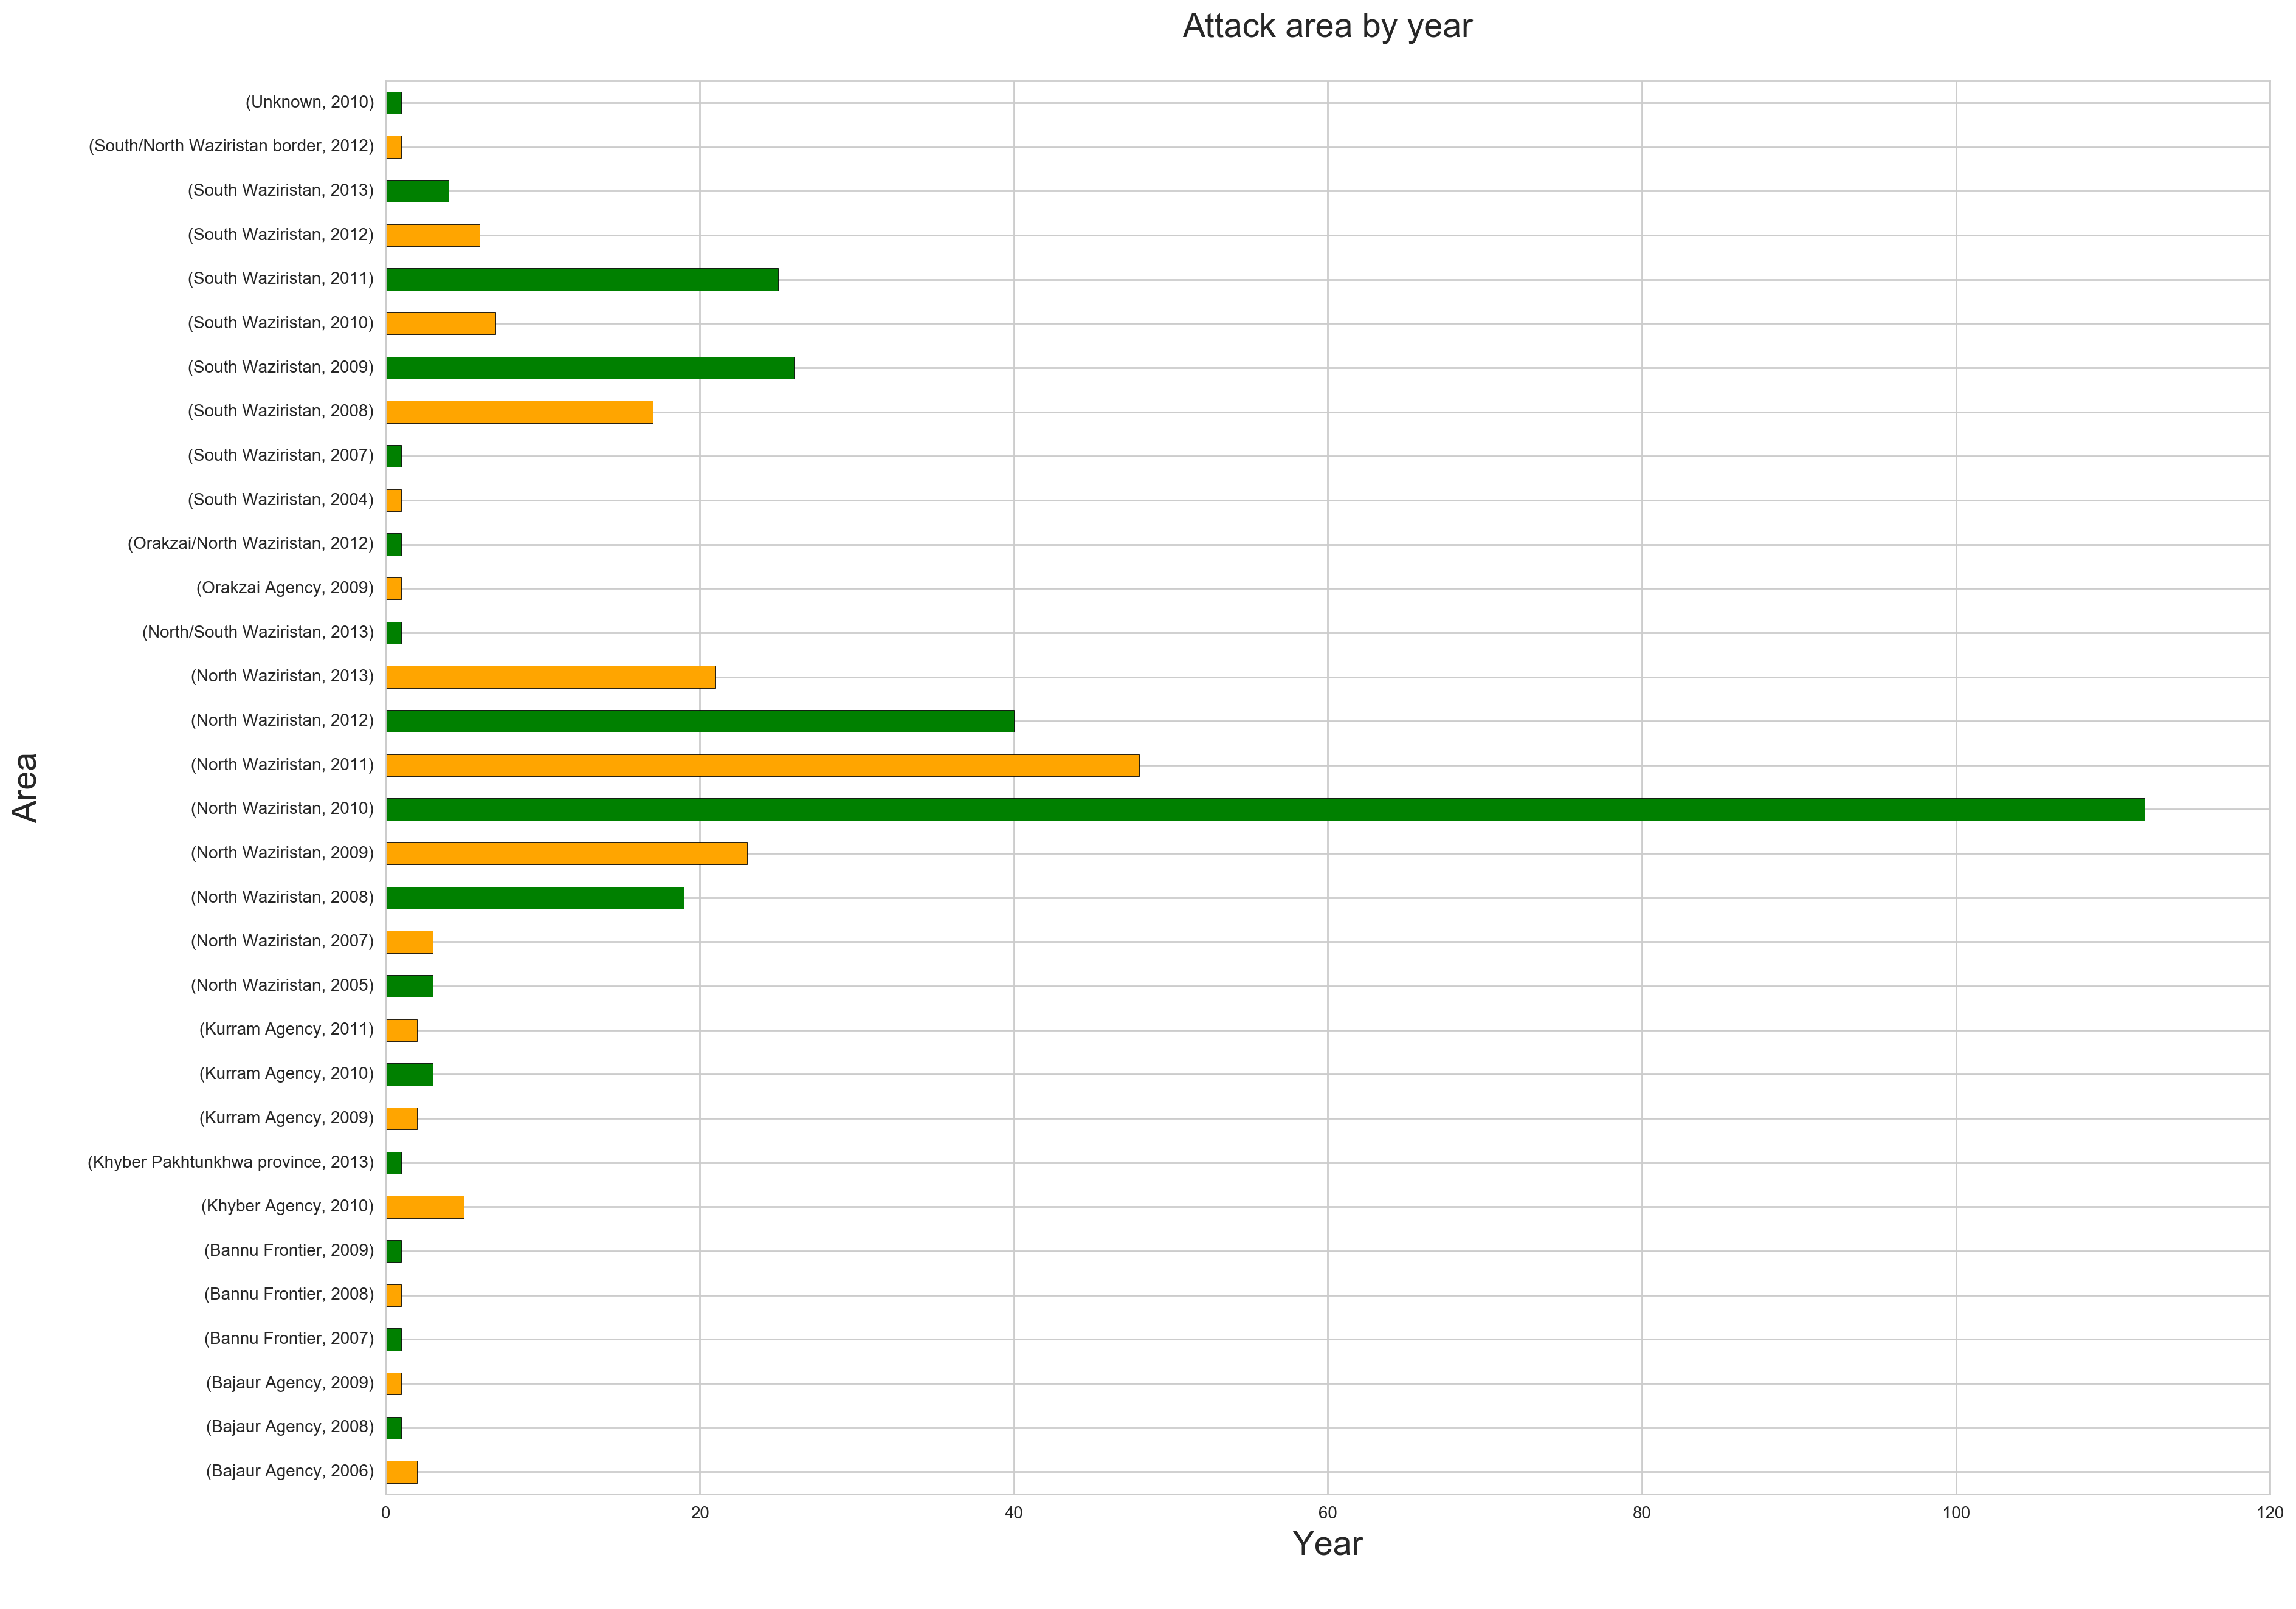

In [15]:
fig = plt.figure(figsize=(20,15))
ax = fig.gca()
drones.groupby(['Area','year']).size().plot(kind="barh", colors=['orange', 'green'], ax=ax)
plt.title('Attack area by year\n', fontsize = 20)
plt.ylabel('Area\n', fontsize=20)
plt.xlabel('Year\n', fontsize=20)
plt.show()

From the result we can see that the area--North Waziristan has been through more attacked than the other areas.

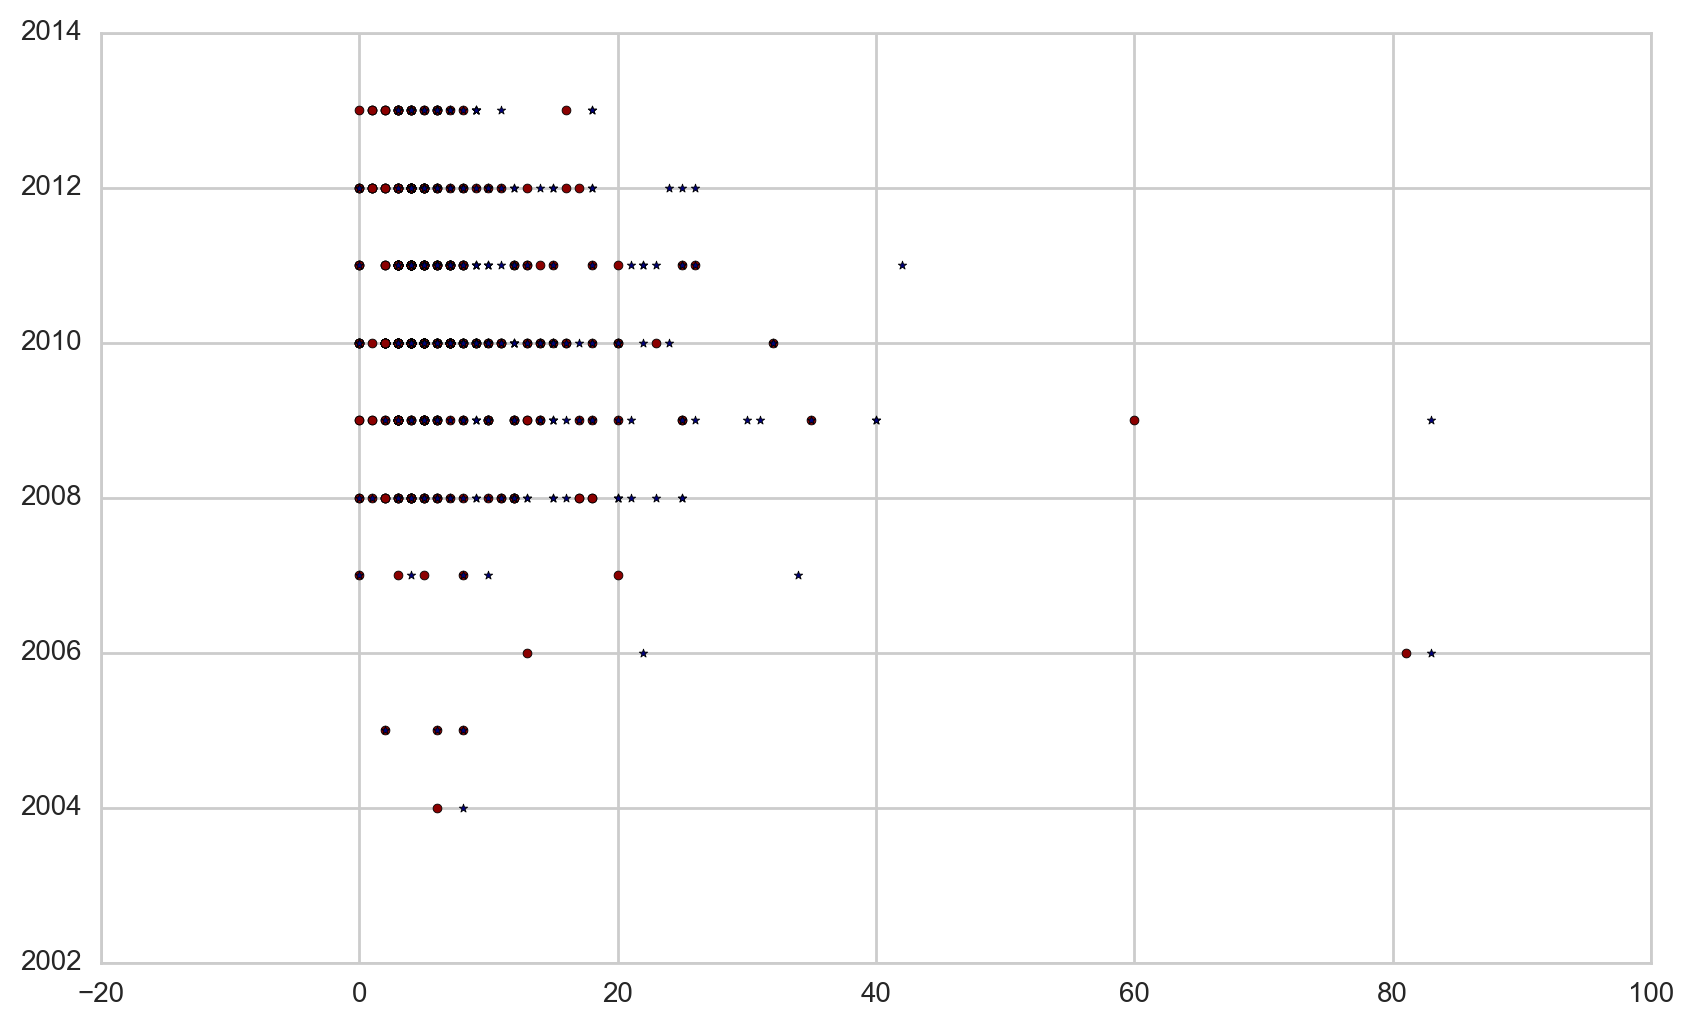

In [16]:
fig = plt.figure(figsize=(10,6))
plt.scatter(drones['min_total_killed'], drones['year'], s=10, c='darkred', marker='o')
plt.scatter(drones['max_total_killed'], drones['year'], s=10, c='navy', marker='*')
plt.show()

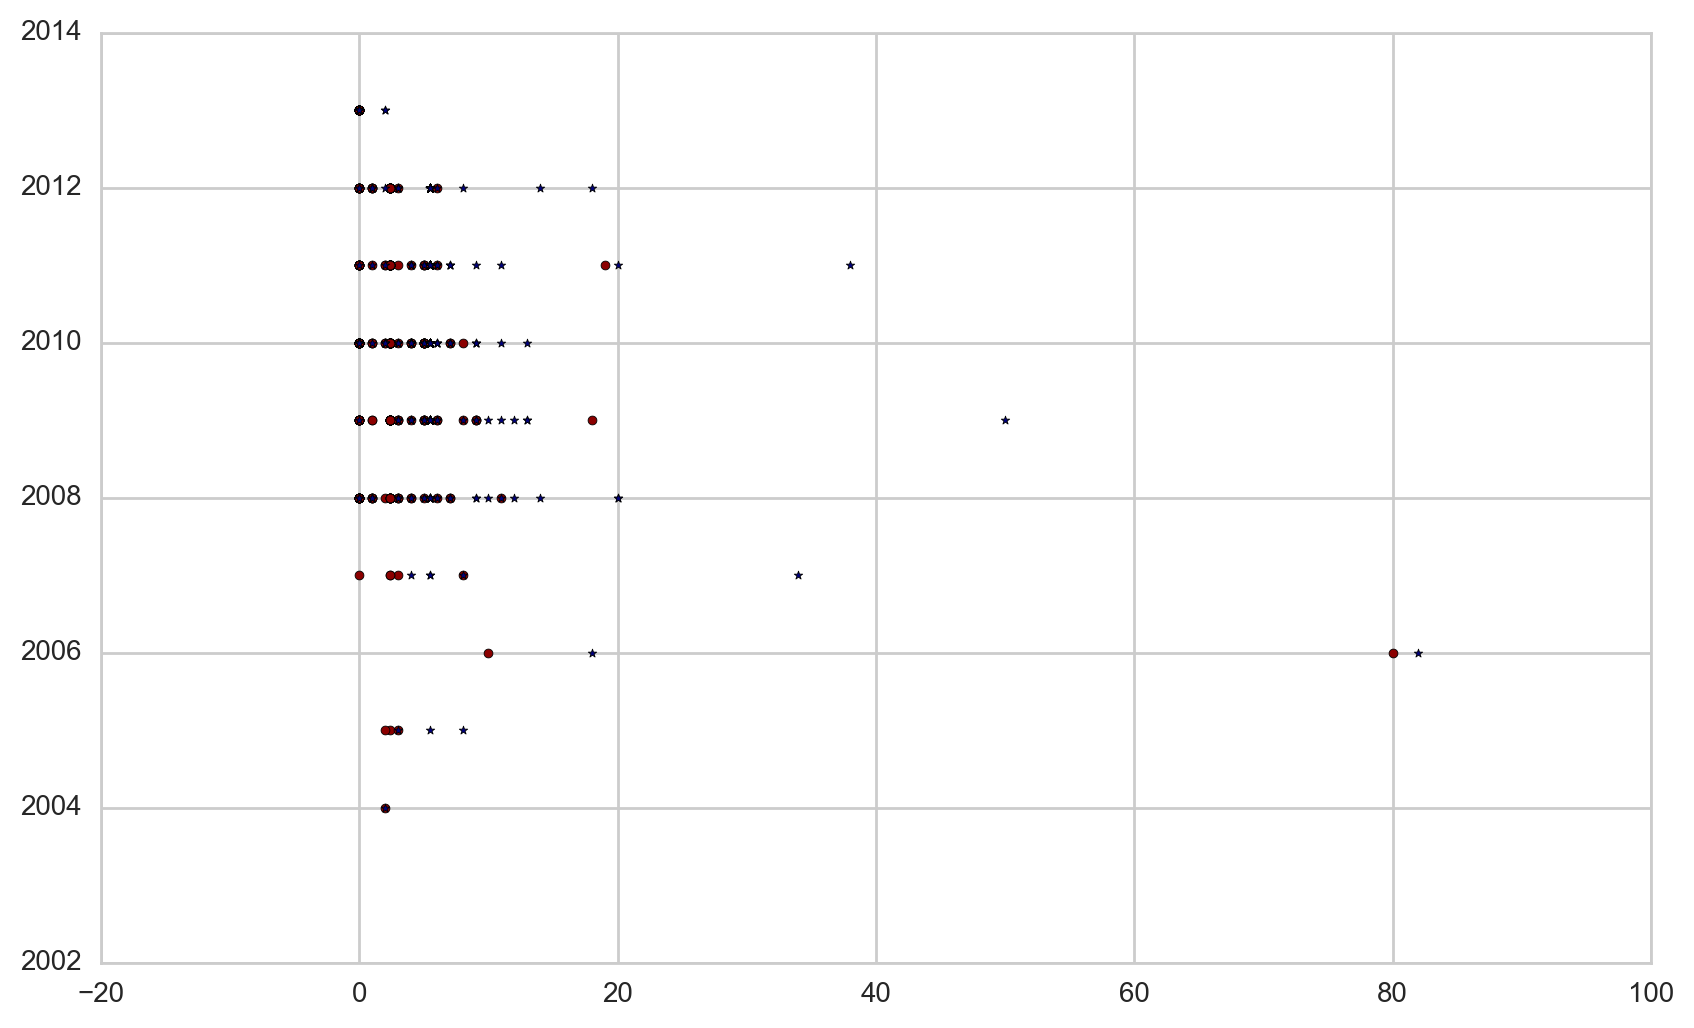

In [17]:
fig = plt.figure(figsize=(10,6))
plt.scatter(drones['min_civi_killed'], drones['year'], s=10, c='darkred', marker='o')
plt.scatter(drones['max_civi_killed'], drones['year'], s=10, c='navy', marker='*')
plt.show()

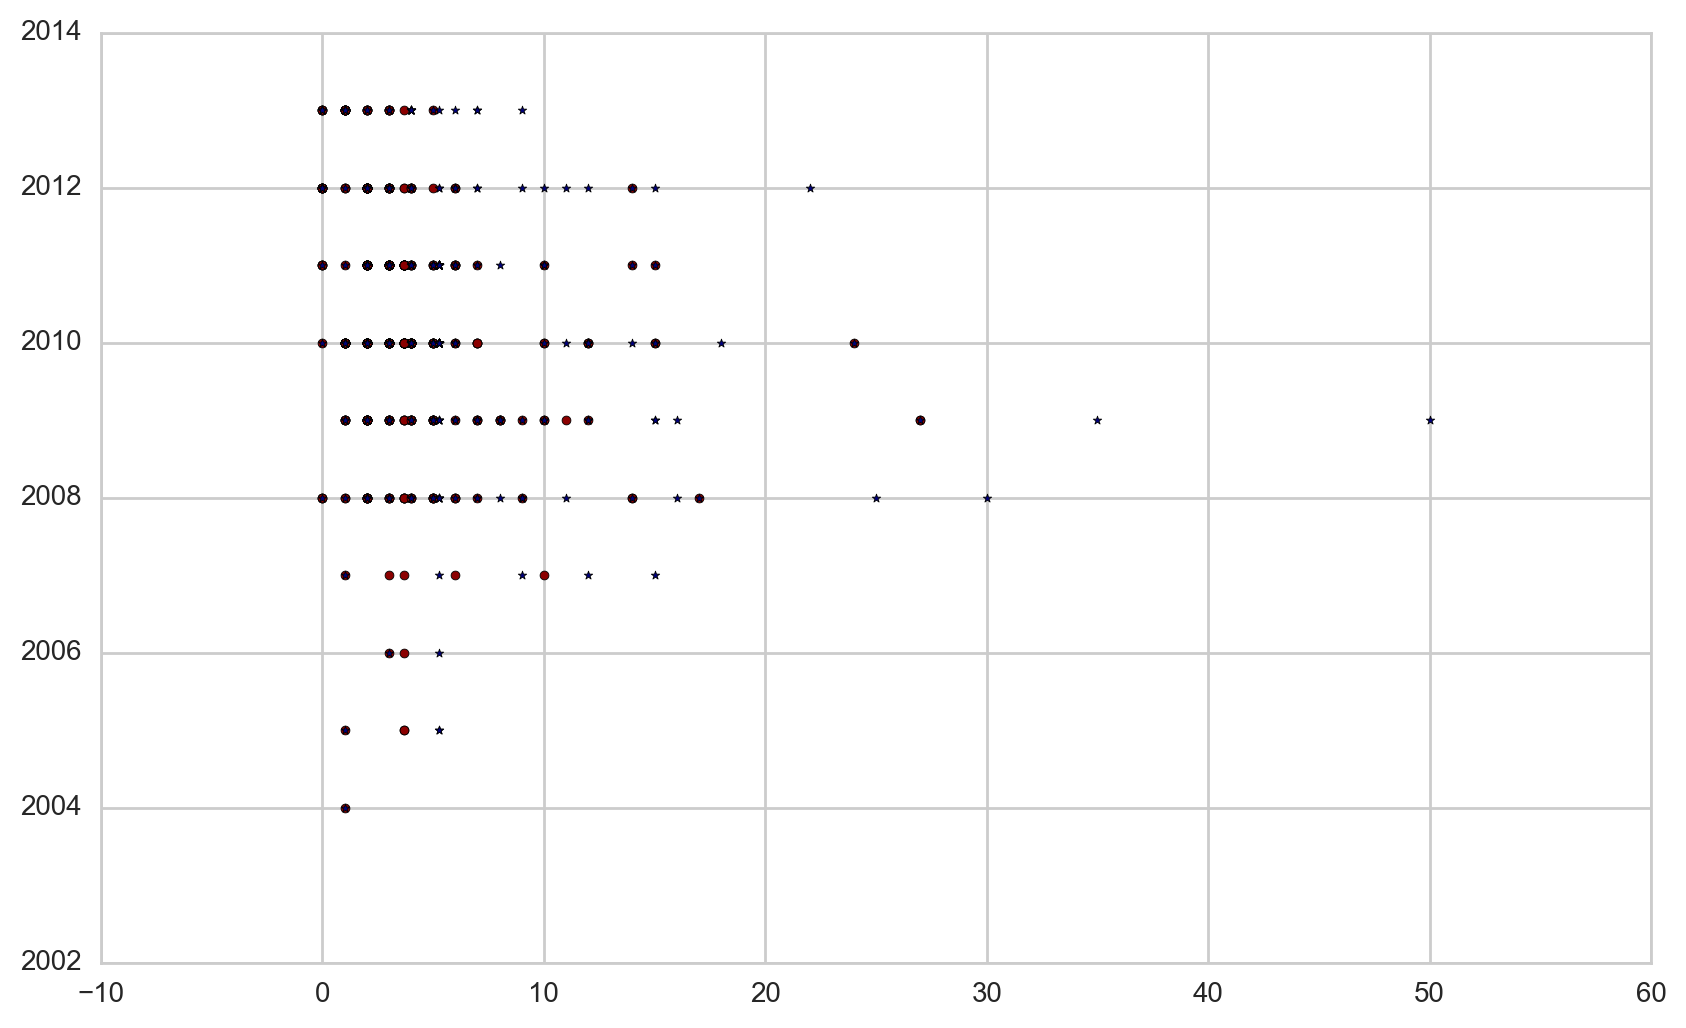

In [18]:
fig = plt.figure(figsize=(10,6))
plt.scatter(drones['min_injured'], drones['year'], s=10, c='darkred', marker='o')
plt.scatter(drones['max_injured'], drones['year'], s=10, c='navy', marker='*')
plt.show()

Same use as the box plot: by observing these three scatter plots above, we can easily find out the outliers in our dataset and delete them if necessary.

#### Correlation

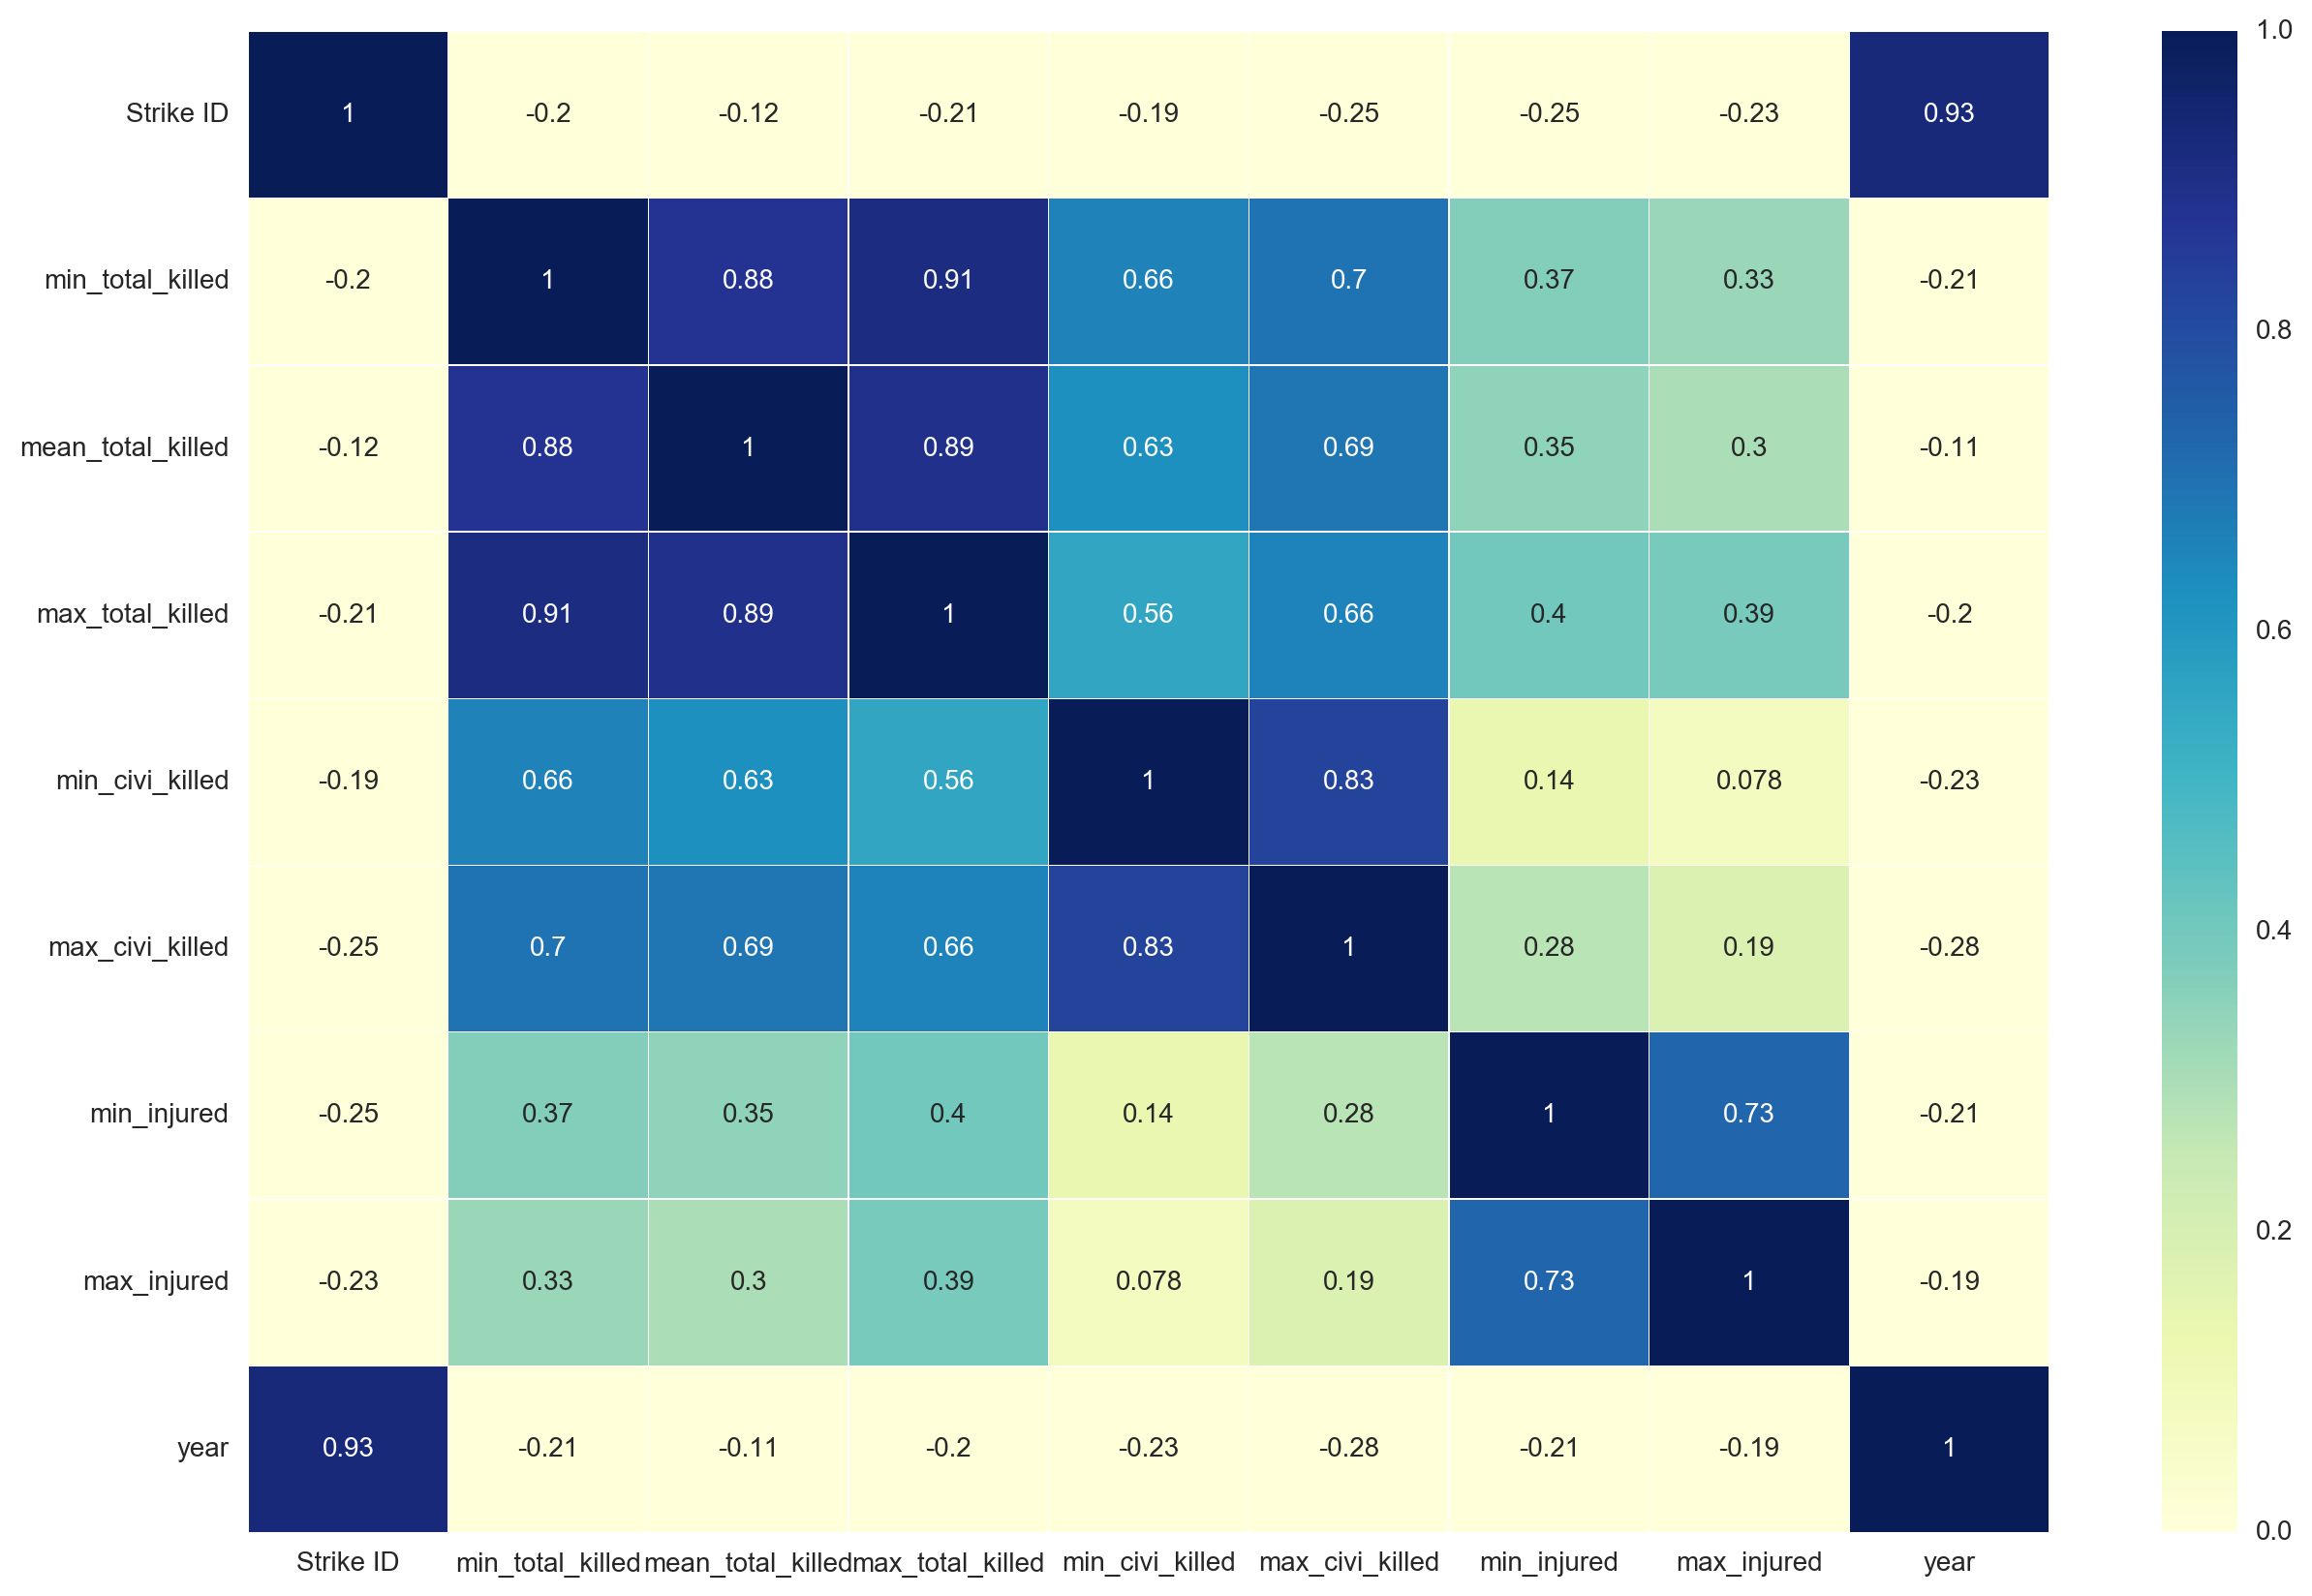

In [19]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca()
sns.heatmap(drones.corr(), annot=True, linewidths=.15, cmap="YlGnBu", vmin=0, vmax=1, ax=ax)
plt.show()

Honestly speaking, variables min/max_civi_killed are the "subsets" of min/max_total_killed. With no surprise, we can see all the variables are more or less positively correlated with each other.

## 3. Brief report

### a). Basic Setup

Exploring the dataset helps us create our report in a comprehensive and accurate way. With the research objectives in minds, we select the potential variables from the dataset. In general, the description table and some statistical plots will give us some essential information. I firstly start with checking the description table and try to find some basic information such as the number of observations, data type, min/max (if integer or float), etc. I dropped variables that either the variable itself including too many missing obs. or being not helpful for the research. Moreover, I replaced all the missing values with the means. 

### b). Some Facts about the dataset 

First of all, I conducted a data distribution check by histogram plot. I found that all the variables: min/max_total_killed, min/max_civi_killed, and min/max_injured have a command pattern --right skewness. To correct this issue, we may want to adopt some appropriate transformations like the "natural log" or "square root" for these variables. 

Both the box plot and scatter plot provide us a picture of the dataset, we can easily read the info: range, cluster, outlier and so on. In order to avoid the heteroscedasticity problem in the regression, deleting those outliers in the dataset is necessary. 

Since the dataset includes a timeline, I assume that there would be a trend over time. By looking at the time series lines, I've noticed that "min/max_total_killed" and "min/max_civi_killed" have increased over time and reached the peak in the year 2007. For the variables "min/max_injured", the maximum point were in 2009, and the numbers of injured were much lower than the number of killed. A plausible reason for this output is due to the Iraq war.

Grouping the attacks by "area" and "year", we can see the area "North Waziristan" had been through more attacks, compared to the other areas. 

### c). Suggestions and Assumptions for the futher research

From the time series plots, we can see the patterns of trend, seasonality, and cycle in each variable. In this case, any output that generated by the original variables may overstate the relationships in the parameters. To have a more accurate analysis, we need to do some work on the transformation such as taking log, plus this process also helps reduce the skewness. Furthermore, it seems that the dataset includes many "states", to dealing with this, switching model would be helpful. The structural breaks can be found by Chow Test.

One more thing, we have to always be aware of the bias caused by omitting variables. Like what I mentioned in section b), Iraq War could be an important exogenous variable.